In [1]:
import torch

In [5]:
X = x.reshape(-1, 4)  # -1 means that the dimension is unknown

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [11]:
# dim: 0 means row, 1 means column
(torch.cat((X, Y), dim=0),torch.cat((X, Y), dim=1))

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
# 行和列的概念
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

深度学习中总是执行原地操作

In [ ]:
Z = torch.zeros_like(Y)
Z[:] = X + Y

In [13]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [30]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [43]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [44]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [47]:
import pandas as pd
import numpy as np
import torch

np.random.seed(42)

# 创建一个包含更多行和列的模拟数据集
rows = 100  # 100行数据
cols = 50   # 50列特征

# 使用 NaN 和随机数填充数据集
data = np.random.rand(rows, cols)
data[data < 0.2] = np.nan  # 将 20% 的数据设为 NaN

# 创建 DataFrame
df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(cols)])
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,0.374540,0.950714,0.731994,0.598658,NaN,NaN,NaN,0.866176,0.601115,0.708073,...,NaN,0.495177,NaN,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,NaN
1,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,NaN,NaN,NaN,0.325330,...,NaN,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,NaN,NaN
2,NaN,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,NaN,...,0.962447,0.251782,0.497249,0.300878,0.284840,NaN,0.609564,0.502679,NaN,0.278646
3,0.908266,0.239562,NaN,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,0.728216,...,NaN,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
4,0.642032,NaN,NaN,0.898554,0.606429,NaN,NaN,0.663502,NaN,NaN,...,0.940459,0.953929,0.914864,0.370159,NaN,0.928319,0.428184,0.966655,0.963620,0.853009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.341244,0.444183,0.675587,0.508894,0.861446,0.866036,NaN,0.778046,0.460734,0.988841,...,NaN,0.953403,NaN,0.297650,0.298066,0.320401,NaN,0.783161,NaN,0.634907
96,NaN,NaN,0.909430,NaN,0.821250,0.544631,NaN,0.955448,0.246961,0.859645,...,0.955649,0.953633,0.352327,NaN,NaN,0.392218,0.947780,NaN,0.763516,NaN
97,0.981258,0.381616,0.775235,0.342591,0.627669,NaN,NaN,0.938064,0.917647,0.887469,...,0.316101,NaN,0.609813,0.240804,0.386807,NaN,NaN,0.297977,NaN,0.910826
98,NaN,0.483860,NaN,0.307679,0.926060,NaN,0.965832,0.205794,0.741566,0.546677,...,0.341849,0.433694,0.848472,0.363255,0.793935,0.940992,0.623210,0.741627,0.805097,0.845040


In [48]:

# 计算每列缺失值的数量
missing_counts = df.isna().sum()
missing_counts

Feature_1     27
Feature_2     23
Feature_3     21
Feature_4     16
Feature_5     20
Feature_6     24
Feature_7     17
Feature_8     20
Feature_9     19
Feature_10    23
Feature_11    26
Feature_12    19
Feature_13    22
Feature_14    20
Feature_15    20
Feature_16    16
Feature_17    21
Feature_18    27
Feature_19    26
Feature_20    19
Feature_21    15
Feature_22    25
Feature_23    20
Feature_24    16
Feature_25    12
Feature_26    15
Feature_27    25
Feature_28    17
Feature_29    21
Feature_30    16
Feature_31    23
Feature_32    17
Feature_33    18
Feature_34    22
Feature_35    24
Feature_36    19
Feature_37    21
Feature_38    22
Feature_39    22
Feature_40    21
Feature_41    22
Feature_42    18
Feature_43    15
Feature_44    15
Feature_45    23
Feature_46    18
Feature_47    27
Feature_48    29
Feature_49    20
Feature_50    25
dtype: int64

In [49]:

# 找出缺失值最多的列
most_missing_column = missing_counts.idxmax()

In [50]:
most_missing_column

'Feature_48'

In [ ]:

# 删除缺失值最多的列
df_cleaned = df.drop(columns=[most_missing_column])

# 使用 PyTorch 将清理后的 DataFrame 转换为张量
tensor_data = torch.tensor(df_cleaned.values, dtype=torch.float32)

# 或者使用 TensorFlow 将清理后的 DataFrame 转换为张量
# tensor_data_tf = tf.convert_to_tensor(df_cleaned.values, dtype=tf.float32)

# 打印张量数据
print(tensor_data)  # 或者 print(tensor_data_tf)

将每个数据样本作为矩阵中的行向量更为常见。例如，沿着张量的最外轴，我们可以访问或遍历小批量的数据样本

Frobenius范数

In [ ]:
torch.mv()
torch.mm()

In [66]:
A = torch.arange(40, dtype=torch.float32).reshape(2,4,5)
A

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]],

        [[20., 21., 22., 23., 24.],
         [25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34.],
         [35., 36., 37., 38., 39.]]])

In [65]:
A/A.sum(axis=1)

RuntimeError: The size of tensor a (10) must match the size of tensor b (4) at non-singleton dimension 1

In [68]:
np.linalg.norm(A, axis=(2))

array([[ 5.477226 , 15.9687195, 27.018513 , 38.144463 ],
       [49.29503  , 60.456596 , 71.624016 , 82.79493  ]], dtype=float32)

In [59]:
A.shape

torch.Size([2, 5, 4])

In [71]:
def f(x):
    return 3 * x ** 2 - 4 * x
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h
x = np.arange(0, 3, 0.1)

/var/folders/zm/zhmj43q907q708ms86x5tlz00000gn/T/ipykernel_11523/1653554027.py:6: RuntimeWarning: divide by zero encountered in divide
  return x ** 3 - 1 / x


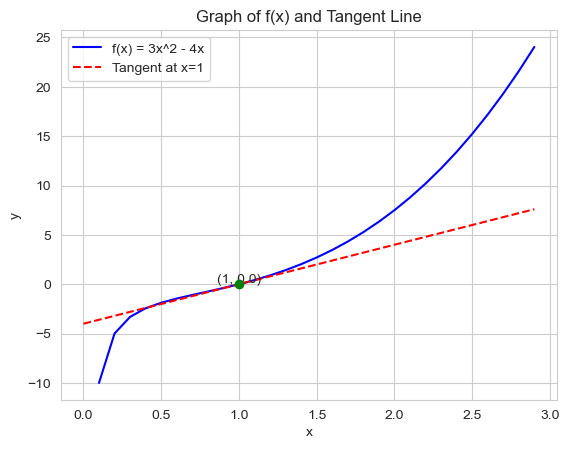

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x):
    return x ** 3 - 1 / x

# 数值导数（近似求导）
def numerical_lim(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

# 计算 f(x) 在 x=1 处的值和导数
x_tangent = 1
f_at_1 = f(x_tangent)  # f(1)
f_prime_at_1 = numerical_lim(f, x_tangent)  # f'(1)

# 计算切线方程：y = f'(1) * (x - 1) + f(1)
def tangent_line(x):
    return f_prime_at_1 * (x - x_tangent) + f_at_1

# 创建 x 范围
x_vals = np.arange(0, 3, 0.1)
y_vals = f(x_vals)

# 计算切线上的 y 值
y_tangent_vals = tangent_line(x_vals)

# 绘制 f(x) 和切线
plt.plot(x_vals, y_vals, label="f(x) = 3x^2 - 4x", color='b')
plt.plot(x_vals, y_tangent_vals, label="Tangent at x=1", color='r', linestyle='--')

# 绘制切点
plt.scatter(x_tangent, f_at_1, color='g', zorder=5)  # 标记切点
plt.text(x_tangent, f_at_1 + 0.2, f'({x_tangent}, {f_at_1})', horizontalalignment='center')

# 添加标签
plt.title('Graph of f(x) and Tangent Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 显示图像
plt.grid(True)
plt.show()

In [70]:
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [94]:
import torch

x = torch.arange(4.0)
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [95]:
y.backward()
x.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [78]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [83]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward() # only apply to scalar
x.grad

tensor([0., 2., 4., 6.])

In [84]:
x.grad.zero_()
y = x * x
u = y.detach() # u is independent of x
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [86]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [99]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
#a.grad == d / a

tensor(True)

In [97]:
a = torch.randn(size=(2,3), requires_grad=True)
a

tensor([[ 1.2670, -0.4228, -1.6668],
        [-0.0671,  1.4506,  1.2191]], requires_grad=True)

In [102]:
a = torch.randn(size=(2,3), requires_grad=True)
d = f(a)

In [152]:
def f(x):
    return torch.sin(x)

In [162]:
x = torch.linspace(0, 10, 100, requires_grad=True)
# x.grad.zero_()
y = torch.sin(x)
y.sum().backward()
f = x.grad

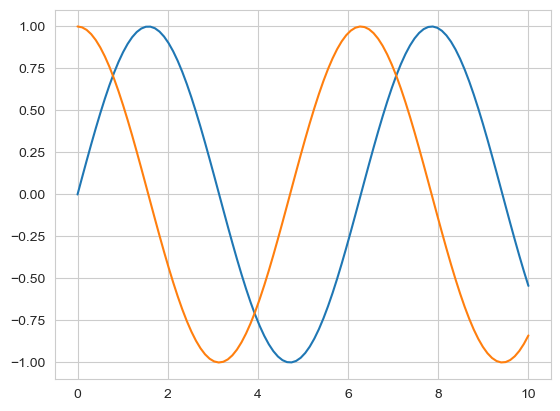

In [163]:
x, y = x.detach().numpy(), y.detach().numpy()
f = f.detach().numpy()
plt.plot(x, y)
plt.plot(x, f)

In [119]:
g = f(d)
g.backword()
d.grad

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [164]:
fair_probs = torch.ones([6]) / 6

In [165]:
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [170]:
from torch.distributions import multinomial
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 1., 2., 1., 3.])

In [174]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1540, 0.1560, 0.1840, 0.1580, 0.1740, 0.1740])

In [184]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[0.3000, 0.2000, 0.0000, 0.1000, 0.3000, 0.1000],
        [0.2000, 0.2000, 0.0500, 0.2000, 0.2000, 0.1500],
        [0.1667, 0.2333, 0.1000, 0.2000, 0.2000, 0.1000],
        ...,
        [0.1745, 0.1741, 0.1707, 0.1655, 0.1516, 0.1637],
        [0.1741, 0.1739, 0.1703, 0.1655, 0.1519, 0.1641],
        [0.1738, 0.1744, 0.1706, 0.1654, 0.1520, 0.1638]])

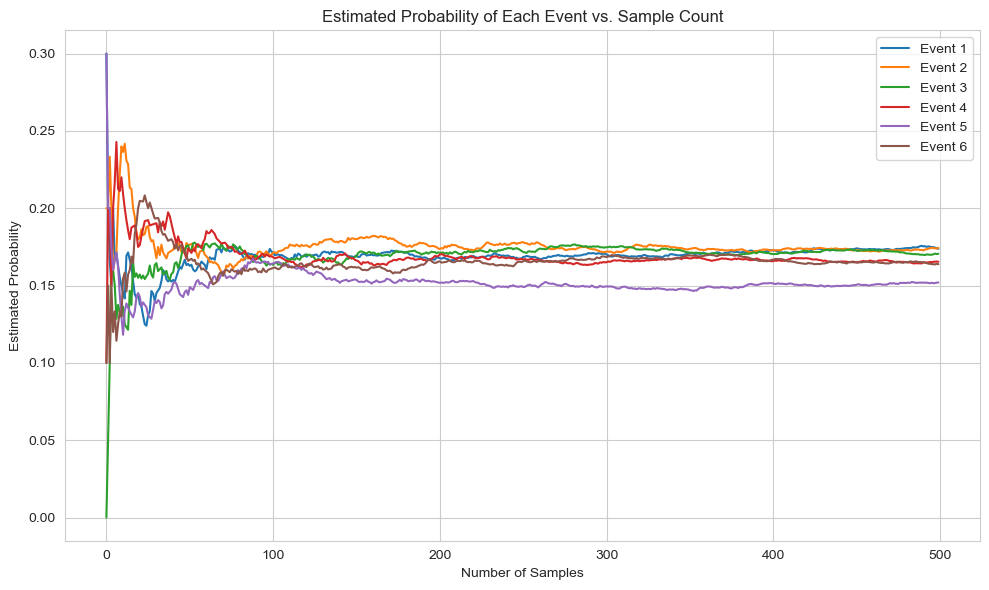

In [185]:
# 绘制每一列随抽样次数的变化
plt.figure(figsize=(10, 6))
for i in range(estimates.shape[1]):  # 遍历每个事件（每列）
    plt.plot(estimates[:, i].numpy(), label=f'Event {i+1}')

plt.title('Estimated Probability of Each Event vs. Sample Count')
plt.xlabel('Number of Samples')
plt.ylabel('Estimated Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

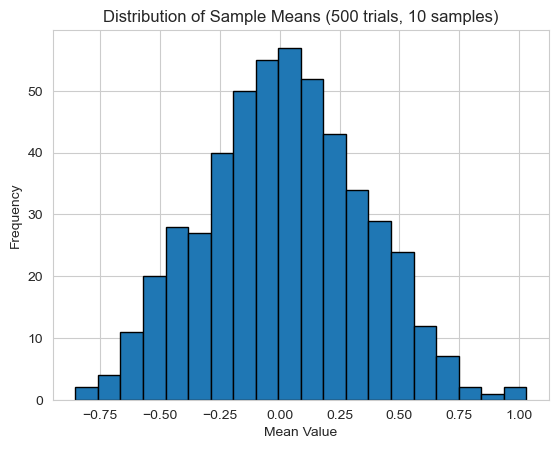

In [187]:
import torch
import matplotlib.pyplot as plt

# Parameters
m = 500  # number of trials
n = 10   # number of samples per trial

# Function to perform the experiment
def experiment(m, n):
    # Initialize an empty list to store results
    results = []

    # Run the experiment for m trials
    for _ in range(m):
        # Generate n random samples from a normal distribution
        samples = torch.randn(n)  # You can change the distribution as needed
        mean = samples.mean()  # Compute the mean of the samples
        results.append(mean.item())  # Store the result

    return results

# Perform the experiment
results = experiment(m, n)

# Analyze the results
# Plot the distribution of sample means
plt.hist(results, bins=20, edgecolor='black')
plt.title(f'Distribution of Sample Means ({m} trials, {n} samples)')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

# Optionally, you can change m and n to observe how the results vary